In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV
import scipy.stats as stats
# notebook setup
seed = 102023
np.random.seed(seed)
pd.set_option("display.max_columns", None)
# importing data
csv = pd.read_csv("churn_clean.csv")
print(f"{csv.info()}")
csv.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5
5,6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,97598fd95658c80500546bc1dd312994,Fort Valley,GA,Peach,31030,32.57032,-83.89040,17701,Urban,America/New_York,Chief Technology Officer,3,83,22660.20,Never Married,Female,No,8.420993,15,3,1,No,One year,Yes,No,NaN,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Electronic Check,7.000994,185.007692,1039.357983,3,3,3,2,4,3,3,3
6,7,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,87d1c4223e49156020564c01a88973b9,Pioneer,TN,Scott,37847,36.43420,-84.27892,2535,Suburban,America/New_York,"Surveyor, hydrographic",0,79,11467.50,Widowed,Male,Yes,11.182725,10,0,1,Yes,Month-to-month,No,No,DSL,Yes,No,No,No,No,Yes,Yes,Yes,No,Electronic Check,13.236774,200.118516,1907.242972,6,5,6,4,1,5,5,5
7,8,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,fce3f21888317907de42e298d718ccce,Oklahoma City,OK,Oklahoma,73109,35.43313,-97.52463,23144,Suburban,America/Chicago,Sales promotion account executive,2,30,26759.64,Married,Female,Yes,7.791632,16,0,0,Yes,Month-to-month,No,No,DSL,No,No,No,Yes,No,No,No,No,Yes,Mailed Check,4.264255,114.950905,979.612708,2,2,2,5,2,3,4,5
8,9,M716771,05a49ee3-8fd5-453a-a5f3-82b6cd986856,6c7043ced703b84de29766af3d53c976,Saint Cloud,FL,Osceola,34771,28.27646,-81.16273,17351,Suburban,America/New_York,Teaching laboratory technician,2,49,58634.51,Separated,Nonbinary,No,5.739006,20,2,3,No,Month-to-month,Yes,No,DSL,Yes,No,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),8.220686,117.468591,1312.874964,5,4,4,3,4,3,4,4
9,10,I676080,86f17e4d-2c24-4b70-a6ec-dddf0609dbaa,6ffe183271258a039e122ced8750b2a0,Cincinnati,OH,Hamilton,45237,39.19296,-84.45230,20193,Rural,America/New_York,Museum education officer,1,86,50231.40,Married,Female,No,8.707824,18,1,0,No,Two Year,Yes,No,Fiber Optic,Yes,No,Yes,N

Data Preparation
---

Number of duplicated customers: 0
InternetService Null Count: 0



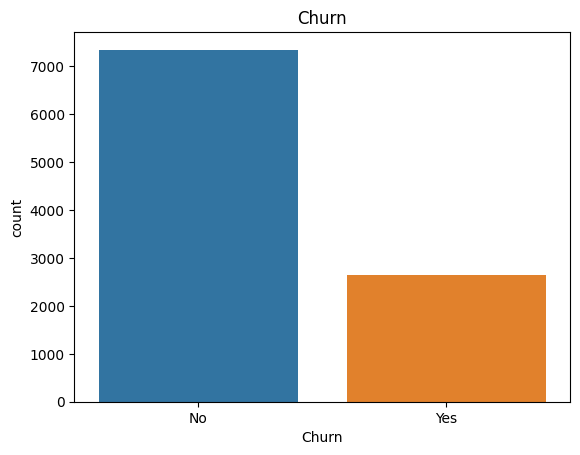

,State,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,AK,38,Urban,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110
1,MI,10446,Urban,1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766
2,OR,3735,Urban,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961
3,CA,13863,Suburban,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412
4,TX,11352,Suburban,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,VT,640,Rural,3,23,55723.74,Married,Male,No,9.415935,12,2,0,No,Month-to-month,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.979400,6511.252601
9996,TN,77168,Rural,4,48,34129.34,Divorced,Male,No,6.740547,15,2,0,No,Two Year,No,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,207.481100,5695.951810
9997,TX,406,Rural,1,48,45983.43,Never Married,Female,No,6.590911,10,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),47.416890,169.974100,4159.305799
9998,GA,35575,Urban,1,39,16667.58,Separated,Male,No,12.071910,14,1,0,No,Two Year,No,Yes,Fiber Optic,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Credit Card (automatic),71.095600,252.624000,6468.456752


In [2]:
# checking duplicates
print(f"Number of duplicated customers: {csv['Customer_id'].duplicated().sum()}")
# defining n/a variables
na_variables = ['CaseOrder', 'Customer_id', 'Interaction', 'UID', 
              'County', 'Zip', 'Lat', 'Lng', 'City', 'TimeZone', 
              'Job', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 
              'Item6', 'Item7', 'Item8']
# removing n/a variables and filling InternetService null values with No_IS
df = csv.copy().loc[:, ~csv.columns.isin(na_variables)].fillna("No_IS")
print(f"InternetService Null Count: {df['InternetService'].isna().sum()}", end="\n\n")
# plotting churn
sns.barplot(x=df['Churn'].value_counts().index,
            y=df['Churn'].value_counts())
plt.title("Churn")
plt.show()
df

In [3]:
# creating sub df's by data type
df_quant = df.select_dtypes(include=('float64', 'int64'))
df_cat = df[['State', 'Area', 'Marital', 'Gender', 'Contract',
                'InternetService', 'PaymentMethod']]
df_y_n = df.loc[:, ~df.columns.isin(df_quant + df_cat)]
# one hot encoding the categorical variables
ohe = OneHotEncoder(sparse_output=False)
df_cat_ohe = pd.DataFrame(ohe.fit_transform(df_cat), columns=ohe.get_feature_names_out(df_cat.columns))
df_y_n = df_y_n.replace({"Yes":1, "No":0})
# concatenating the processed df
df_processed = pd.concat([df_quant, df_cat_ohe, df_y_n], axis=1)
print(df_processed.info())
df_processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 97 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Population                              10000 non-null  int64  
 1   Children                                10000 non-null  int64  
 2   Age                                     10000 non-null  int64  
 3   Income                                  10000 non-null  float64
 4   Outage_sec_perweek                      10000 non-null  float64
 5   Email                                   10000 non-null  int64  
 6   Contacts                                10000 non-null  int64  
 7   Yearly_equip_failure                    10000 non-null  int64  
 8   Tenure                                  10000 non-null  float64
 9   MonthlyCharge                           10000 non-null  float64
 10  Bandwidth_GB_Year                       10000 non-null  flo

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_PR,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area_Rural,Area_Suburban,Area_Urban,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Contract_Month-to-month,Contract_One year,Contract_Two Year,InternetService_DSL,InternetService_Fiber Optic,InternetService_No_IS,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Churn,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,38,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,1,1,1,0,1,1,0,0,0,1,1
1,10446,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,1,0,1,1,1,1,0,0,0,1,1,1
2,3735,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,1,0,1,1,0,0,0,0,0,1,1
3,13863,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,1,0,1,0,0,0,1,0,1
4,11352,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,640,3,23,55723.74,9.415935,12,2,0,68.197130,159.979400,6511.252601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1,1,1,1,0,1,1,0,0,0,0
9996,77168,4,48,34129.34,6.740547,15,2,0,61.040370,207.481100,5695.951810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

Forward Stepwise Variable Selection
---

In [4]:
# creating variables for forward stepwise selection
df_ = df_processed.copy()
target = 'Churn'
candidate_vars = list(df_.loc[:, df_.columns != target].columns)
sig_vars = list()
auc_scores = list()
# defining functions for forward stepwise selection
def auc(vars, target, df):
    X = df[vars]
    y = df[target]
    LogReg = LogisticRegression(max_iter=10000)
    LogReg.fit(X, y)
    predictions = LogReg.predict_proba(X)[:, 1]
    auc_score = roc_auc_score(y, predictions)
    return auc_score
def next_best(sig_vars, candidate_vars, target, df):
    best_auc = -1
    best_var = None
    for var in candidate_vars:
        var_auc = auc(sig_vars + [var], target, df)
        if var_auc >= best_auc:
            best_auc = var_auc
            best_var = var
    return best_var, best_auc

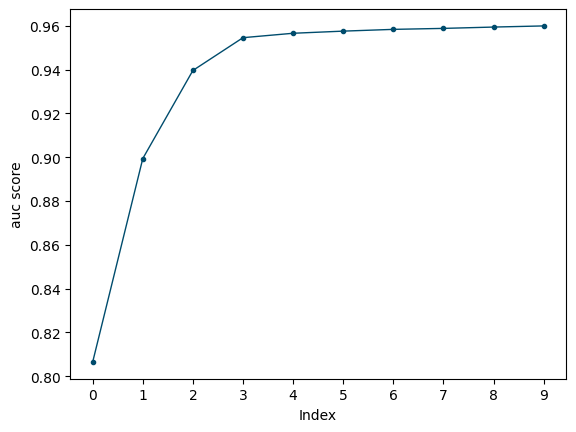

In [5]:
# forward stepwise selection loop
for i in range(10):
    best_var, best_auc = next_best(sig_vars, candidate_vars, target, df_)
    sig_vars.append(best_var)
    candidate_vars.remove(best_var)
    auc_scores.append(best_auc)
# auc score plotting
plt.plot(auc_scores,
         color="#004c6d",
         linewidth=1,
         marker='o',
         markersize=3)
plt.xlabel("Index")
plt.xticks(np.arange(0,10,1))
plt.ylabel("auc score")
#plt.title("auc score by index of sig_vars")
plt.show()

In [6]:
# variable selection
most_sig_vars = sig_vars[0:4]
most_sig_vars

['Tenure',
 'MonthlyCharge',
 'Contract_Month-to-month',
 'InternetService_Fiber Optic']

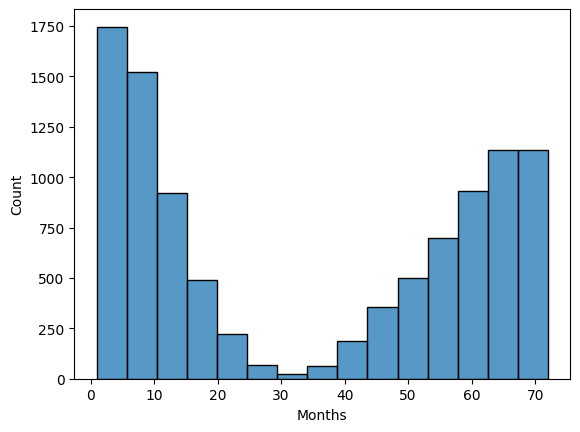

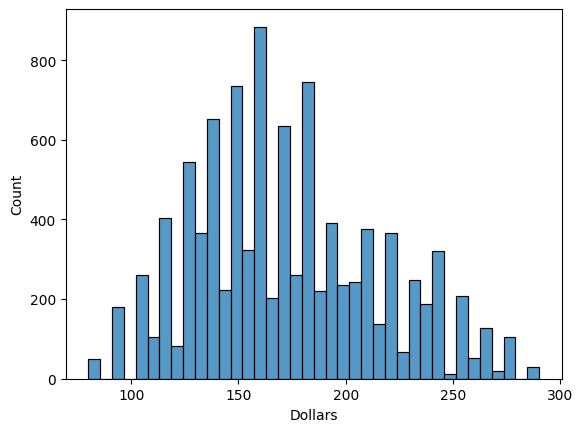

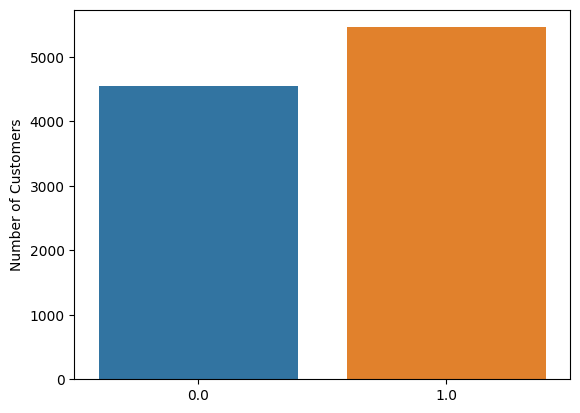

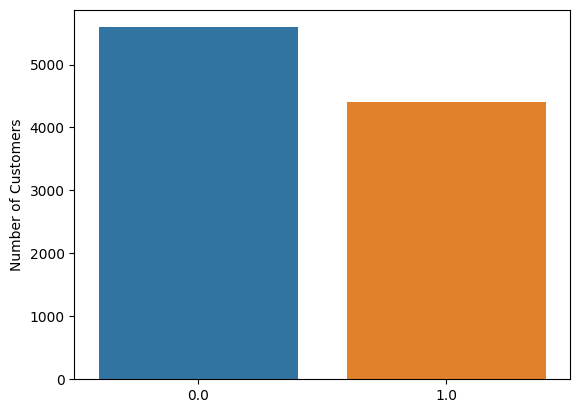

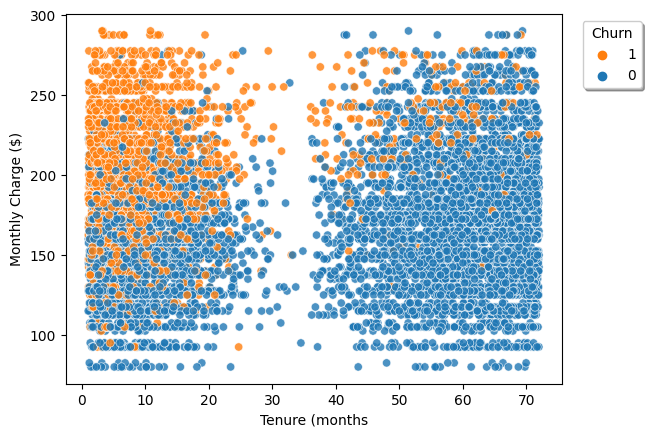

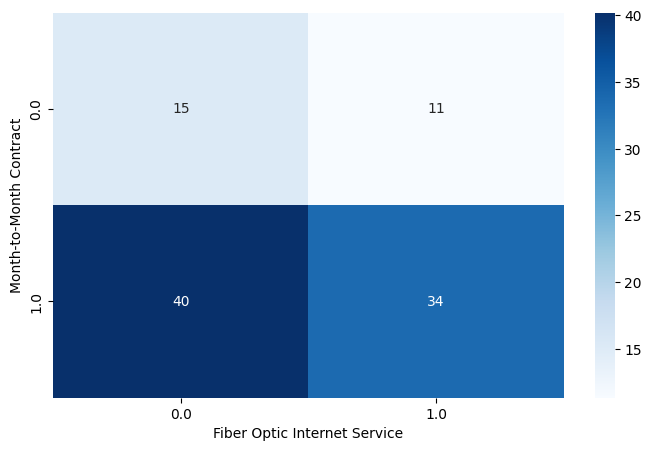

InternetService_Fiber Optic        0.0        1.0  Column_Sum
Contract_Month-to-month                                      
0.0                          15.264188  11.362494   26.626682
1.0                          40.171222  33.650269   73.821490
Row_Sum                      55.435409  45.012762         NaN


In [7]:
# univariate plotting
for col in df_processed:
    if col in ['Tenure', 'MonthlyCharge']:
        sns.histplot(df_processed[col])#,
                    #fill=True)
        #plt.title(col)
        if col == 'Tenure':
            plt.xlabel("Months")
        else:
            plt.xlabel("Dollars")
        plt.show()
    elif col in ['Contract_Month-to-month', 'InternetService_Fiber Optic']:
        sns.barplot(x=df_processed[col].value_counts().index,
                    y=df_processed[col].value_counts())
        #plt.title(col)
        plt.ylabel("Number of Customers")
        plt.xlabel("")
        plt.show()
# bivariate plotting - quantitiative
sns.scatterplot(data=df_processed,
                x='Tenure',
                y='MonthlyCharge',
                hue='Churn',
                alpha = 0.8)
#plt.title(f"Churn ~ Tenure & Monthly Charge")
plt.xlabel("Tenure (months")
plt.ylabel("Monthly Charge ($)")
plt.legend(bbox_to_anchor=(1.175, 1),
            loc="upper right",
            reverse=True,
            title="Churn",
            shadow=True)
plt.show()
# bivariate plotting - categorical
pivot_table = df_processed.pivot_table(index='Contract_Month-to-month', 
                                       columns='InternetService_Fiber Optic', 
                                       values='Churn', 
                                       aggfunc="mean")*100
plt.figure(figsize=(8.23, 5))
sns.heatmap(pivot_table, annot=True, 
            cmap='Blues', 
            cbar=True)
#plt.title("Churn(%) ~ Month-to-Month Contract & Fiber Optic Internet Service")
plt.xlabel("Fiber Optic Internet Service")
plt.ylabel("Month-to-Month Contract")
plt.show()
# pivot table
pivot_table = df_processed.pivot_table(index='Contract_Month-to-month',
                                       columns='InternetService_Fiber Optic',
                                       values='Churn',
                                       aggfunc="mean") * 100
row_sums = pivot_table.sum(axis=0)
col_sums = pivot_table.sum(axis=1)
pivot_table['Column_Sum'] = col_sums
pivot_table.loc['Row_Sum'] = row_sums
print(pivot_table)

Predicting Churn in the Reduced Dataframe using Logistic Regression
---

In [8]:
# Defining the reduced model
df_model = df_processed.loc[:, most_sig_vars + ['Churn']]
X = df_model.loc[:, df_model.columns != 'Churn']
y = df_model['Churn']
print(df_model.info())
df_model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tenure                       10000 non-null  float64
 1   MonthlyCharge                10000 non-null  float64
 2   Contract_Month-to-month      10000 non-null  float64
 3   InternetService_Fiber Optic  10000 non-null  float64
 4   Churn                        10000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 390.8 KB
None


,Tenure,MonthlyCharge,Contract_Month-to-month,InternetService_Fiber Optic,Churn
0,6.795513,172.455519,0.0,1.0,0
1,1.156681,242.632554,1.0,1.0,1
2,15.754144,159.947583,0.0,0.0,0
3,17.087227,119.956840,0.0,0.0,0
4,1.670972,149.948316,1.0,1.0,1
...,...,...,...,...,...
9995,68.197130,159.979400,1.0,0.0,0
9996,61.040370,207.481100,0.0,1.0,0
9997,47.416890,169.974100,1.0,1.0,0
9998,71.095600,252.624000,0.0,1.0,0


Average Performance Metricsfor Predicting Churn using Logistic Regression:
Accuracy mean: 89.42999999999999%
Sensitivity mean: 78.11%
Specificity mean: 93.51%



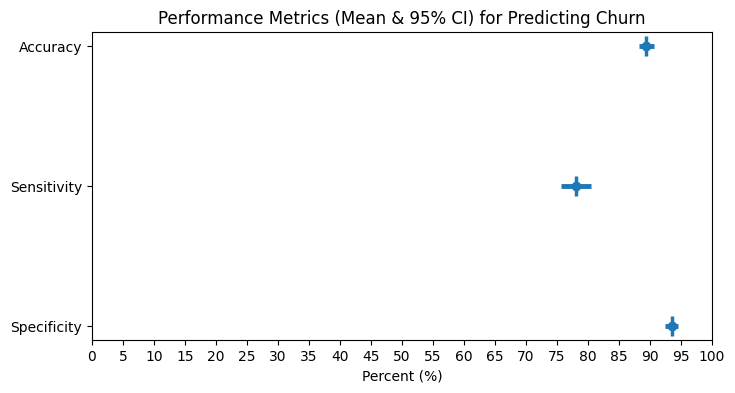

In [9]:
# cross validation preparation
cv_stratified = StratifiedKFold(n_splits=10, shuffle=True)
logreg = LogisticRegression()
def sensitivity_scorer(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn)
def specificity_scorer(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)
scoring = {
    'accuracy': 'accuracy',
    'sensitivity': make_scorer(sensitivity_scorer),
    'specificity': make_scorer(specificity_scorer)}
# fitting and storing cross validation performance metrics
cv_scores = cross_validate(logreg, X, y, cv=cv_stratified, scoring=scoring)
accuracy_scores = cv_scores['test_accuracy']
sensitivity_scores = cv_scores['test_sensitivity']
specificity_scores = cv_scores['test_specificity']
accuracy = {'mean': np.mean(accuracy_scores),
            'confidence_interval': stats.t.interval(confidence=0.95, 
                                                    df=len(accuracy_scores)-1, 
                                                    loc=np.mean(accuracy_scores), 
                                                    scale=stats.sem(accuracy_scores))}
sensitivity = {'mean': np.mean(sensitivity_scores),
          'confidence_interval': stats.t.interval(confidence=0.95, 
                                                  df=len(sensitivity_scores)-1, 
                                                  loc=np.mean(sensitivity_scores), 
                                                  scale=stats.sem(sensitivity_scores))}
specificity = {'mean': np.mean(specificity_scores),
             'confidence_interval': stats.t.interval(confidence=0.95, 
                                                     df=len(specificity_scores)-1, 
                                                     loc=np.mean(specificity_scores), 
                                                     scale=stats.sem(specificity_scores))}
print("Average Performance Metricsfor Predicting Churn using Logistic Regression:")
print(f"Accuracy mean: {round(accuracy['mean'],4)*100}%")
print(f"Sensitivity mean: {round(sensitivity['mean'],4)*100}%")
print(f"Specificity mean: {round(specificity['mean'],4)*100}%", end="\n\n")
# plotting the confidence intervals for the performance metrics
means = [specificity['mean']*100, sensitivity['mean']*100, accuracy['mean']*100]
metrics = ["Specificity", "Sensitivity", "Accuracy"]
confidence_intervals = [(specificity["confidence_interval"][1] - specificity["confidence_interval"][0])*100,
                        (sensitivity["confidence_interval"][1] - sensitivity["confidence_interval"][0])*100,
                        (accuracy["confidence_interval"][1] - accuracy["confidence_interval"][0])*100]
plt.figure(figsize=(8, 4))
plt.scatter(means, metrics, marker="|", linewidth=2.5, s=200)
plt.errorbar(means, metrics, xerr=confidence_intervals, fmt="o", elinewidth=3.5)
plt.title("Performance Metrics (Mean & 95% CI) for Predicting Churn")
plt.xticks(range(0, 101, 5))
plt.xlabel("Percent (%)")
plt.show()

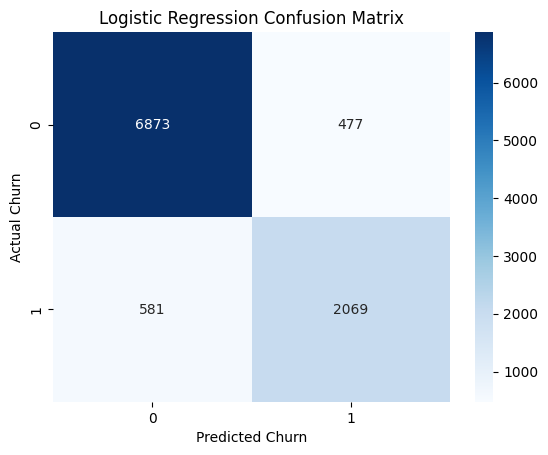

Coefficients:


{'Tenure': -0.10589215727701638,
 'MonthlyCharge': 0.054640225964961806,
 'Contract_Month-to-month': 3.117655748259253,
 'InternetService_Fiber Optic': -2.0891811105566394}

In [10]:
# fitting a logistic regression to obtain predictions and coefficients
logreg = LogisticRegression()
logreg.fit(X,y)
churn_pred = logreg.predict(X)
df_processed['Prediction'] = churn_pred
# confusion matrix
conf_matrix = confusion_matrix(df_model['Churn'], churn_pred)
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt="d", 
            cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Churn")
plt.ylabel("Actual Churn")
plt.show()
# printing coefficients
coef_dict = {}
for variable, coefficient in zip(X.columns, logreg.coef_[0]):
    coef_dict[variable] = coefficient
print("Coefficients:")
coef_dict

Identifying Variables Correlated with non-Churn in "high risk" Groups using Logistic Lasso Regression
---

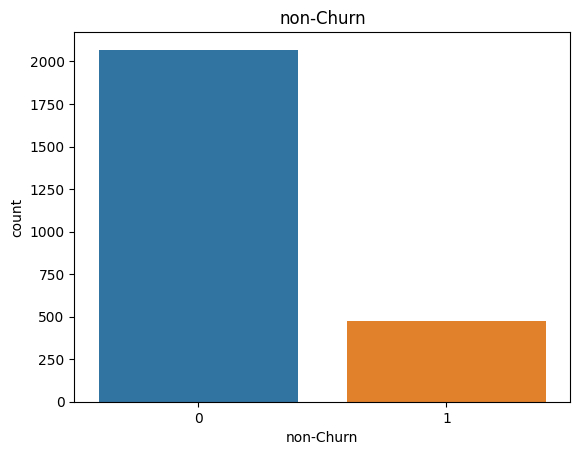

"high risk" Dataframe:


,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Bandwidth_GB_Year,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_PR,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area_Rural,Area_Suburban,Area_Urban,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Contract_One year,Contract_Two Year,InternetService_DSL,InternetService_No_IS,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,non-Churn
0,10446,1,27,21704.77,11.699080,12,0,1,800.982766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,1,1,1,0,0,0,1,1,1,0
1,2535,0,79,11467.50,11.182725,10,0,1,1907.242972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,1,1,1,0,0
2,555,7,23,22580.70,9.341632,9,0,2,2728.767869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,1,1,1,0,0,1,0,0,1
3,8165,1,30,64256.81,11.790730,10,3,0,1582.295235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,1,0,0,1,0
4,50079,0,63,31659.30,13.522847,13,1,0,2070.376729,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1,0,1,1,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,3097,1,63,62904.47,15.713720,10,0,0,5673.346337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,1,1,0,1,1,0,1,1,0,0
2542,768,1,19,42381.63,9.741873,6,1,0,5672.753791,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0,1,1,1,1,1,0,1,1,1

In [11]:
# Defining high risk df
df_high_risk = df_processed.loc[df_processed['Prediction'] == 1, :].copy().reset_index(drop=True)
df_high_risk['non-Churn'] = np.abs(df_high_risk['Churn'] - 1)
df_high_risk = df_high_risk.drop(columns=['Churn', 'Prediction', 'MonthlyCharge', 'Tenure', 'Contract_Month-to-month', 'InternetService_Fiber Optic'])
# plotting churn
sns.barplot(x=df_high_risk['non-Churn'].value_counts().index,
            y=df_high_risk['non-Churn'].value_counts())
plt.title("non-Churn")
plt.show()
print('"high risk" Dataframe:')
df_high_risk

In [12]:
# GridSearchCV preparation
X = df_high_risk.loc[:, df_high_risk.columns != 'non-Churn']
y = df_high_risk['non-Churn']
columns_to_scale = ['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 
                    'Yearly_equip_failure', 'Bandwidth_GB_Year']
pipeline = Pipeline([
    ('scaler', ColumnTransformer(transformers=[('scaler', StandardScaler(), columns_to_scale)],remainder='passthrough')),
    ('regressor', LogisticRegression(penalty="l1", solver='saga', max_iter=10000))])
C_values = np.concatenate([np.logspace(-4,4,9)])
param_grid = {'regressor__C': C_values}
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True)
# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring={'sensitivity': make_scorer(sensitivity_scorer)}, cv=cv_stratified, refit='sensitivity')
grid_search.fit(X, y)
C = grid_search.best_params_['regressor__C']
print(C)

1000.0


Average Performance Metrics for Predicting non-Churn using Logistic Lasso Regression:
Accuracy mean: 81.5%
Sensitivity mean: 28.09%
Specificity mean: 93.81%



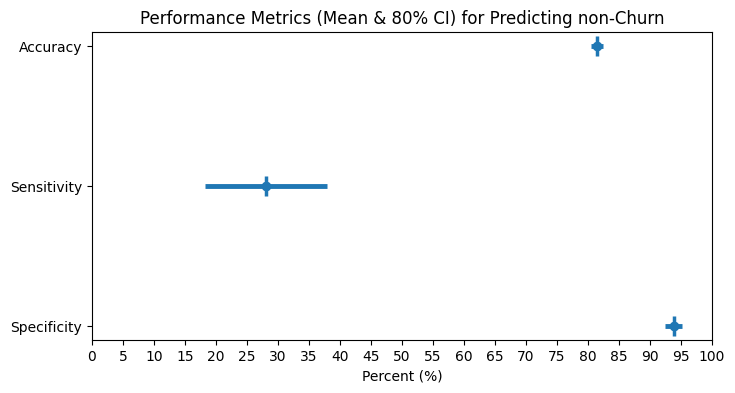

In [13]:
# cross validation preparation
columns_to_scale = ['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 
                    'Yearly_equip_failure', 'Bandwidth_GB_Year']
pipeline = Pipeline([
    ('scaler', ColumnTransformer(transformers=[('scaler', StandardScaler(), columns_to_scale)],remainder='passthrough')),
    ('regressor', LogisticRegression(penalty="l1", solver='saga', C=C, max_iter=10000))])
def sensitivity_scorer(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn)
def specificity_scorer(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)
scoring = {
    'accuracy': 'accuracy',
    'sensitivity': make_scorer(sensitivity_scorer),
    'specificity': make_scorer(specificity_scorer)}
# fitting and storing cross validation performance metrics
cv_scores = cross_validate(pipeline, X, y, cv=cv_stratified, scoring=scoring)
accuracy_scores = cv_scores['test_accuracy']
sensitivity_scores = cv_scores['test_sensitivity']
specificity_scores = cv_scores['test_specificity']
accuracy = {'mean': np.mean(accuracy_scores),
            'confidence_interval': stats.t.interval(confidence=0.8, 
                                                    df=len(accuracy_scores)-1, 
                                                    loc=np.mean(accuracy_scores), 
                                                    scale=stats.sem(accuracy_scores))}
sensitivity = {'mean': np.mean(sensitivity_scores),
          'confidence_interval': stats.t.interval(confidence=0.8, 
                                                  df=len(sensitivity_scores)-1, 
                                                  loc=np.mean(sensitivity_scores), 
                                                  scale=stats.sem(sensitivity_scores))}
specificity = {'mean': np.mean(specificity_scores),
             'confidence_interval': stats.t.interval(confidence=0.8, 
                                                     df=len(specificity_scores)-1, 
                                                     loc=np.mean(specificity_scores), 
                                                     scale=stats.sem(specificity_scores))}
print("Average Performance Metrics for Predicting non-Churn using Logistic Lasso Regression:")
print(f"Accuracy mean: {round(accuracy['mean'],4)*100}%")
print(f"Sensitivity mean: {round(sensitivity['mean'],4)*100}%")
print(f"Specificity mean: {round(specificity['mean'],4)*100}%", end="\n\n")
# plotting the confidence intervals for the performance metrics
means = [specificity['mean']*100, sensitivity['mean']*100, accuracy['mean']*100]
metrics = ["Specificity", "Sensitivity", "Accuracy"]
confidence_intervals = [(specificity["confidence_interval"][1] - specificity["confidence_interval"][0])*100,
                        (sensitivity["confidence_interval"][1] - sensitivity["confidence_interval"][0])*100,
                        (accuracy["confidence_interval"][1] - accuracy["confidence_interval"][0])*100]
plt.figure(figsize=(8, 4))
plt.scatter(means, metrics, marker="|", linewidth=2.5, s=200)
plt.errorbar(means, metrics, xerr=confidence_intervals, fmt="o", elinewidth=3.5)
plt.title("Performance Metrics (Mean & 80% CI) for Predicting non-Churn")
plt.xticks(range(0, 101, 5))
plt.xlabel("Percent (%)")
plt.show()

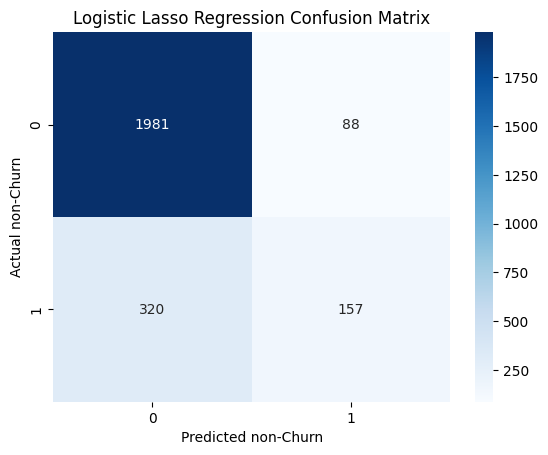

Coefficients:


{'Population': 0.02217682842386334,
 'Children': -0.08436164948464736,
 'Age': 0.06063341802838798,
 'Income': 0.037525491790659025,
 'Outage_sec_perweek': 0.04831627551145917,
 'Email': 0.06321697715694198,
 'Contacts': -0.08842577141979964,
 'Yearly_equip_failure': 0.10632968046519092,
 'Bandwidth_GB_Year': 1.4850881046057698,
 'State_AK': 0.02203771859395912,
 'State_AL': 0.5417775671975574,
 'State_AR': 0.7859179577965879,
 'State_AZ': -0.34212414204301395,
 'State_CA': -0.12943548098381139,
 'State_CO': 0.42230360477453893,
 'State_CT': -0.02851822565951772,
 'State_DC': -0.44587686685923217,
 'State_DE': 0.9988694870026716,
 'State_FL': 0.5156936897423628,
 'State_GA': -0.6461828564909188,
 'State_HI': -0.8892717854692064,
 'State_IA': 2.1159307090755845e-05,
 'State_ID': 0.26072984891657636,
 'State_IL': 0.11136791508384312,
 'State_IN': 0.04410655350351986,
 'State_KS': -0.0494138959580072,
 'State_KY': 0.259761827312168,
 'State_LA': 0.2792175905469915,
 'State_MA': -0.3866918

In [14]:
# preparation for logistic lasso regression
columns_to_scale = ['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 
                    'Yearly_equip_failure', 'Bandwidth_GB_Year']
quant_scaler = ColumnTransformer(transformers=[('scaler', StandardScaler(), columns_to_scale)],remainder='passthrough')
transformed_data = quant_scaler.fit_transform(df_high_risk)
df_scaled = pd.DataFrame(transformed_data, columns=df_high_risk.columns)
X = df_scaled.loc[:, df_scaled.columns != 'non-Churn']
y = df_scaled['non-Churn']
# fitting a logistic lasso regression to obtain predictions and coefficients
logreg = LogisticRegression(penalty="l1", C=C, 
                            solver='saga', max_iter=10000)
logreg.fit(X,y)
non_churn_pred = logreg.predict(X)
# confusion matrix
conf_matrix = confusion_matrix(df_scaled['non-Churn'], non_churn_pred)
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt="d", 
            cmap="Blues")
plt.title("Logistic Lasso Regression Confusion Matrix")
plt.xlabel("Predicted non-Churn")
plt.ylabel("Actual non-Churn")
plt.show()
# printing coefficients
coef_dict = {}
for variable, coefficient in zip(X.columns, logreg.coef_[0]):
    coef_dict[variable] = coefficient
print("Coefficients:")
coef_dict